# 🪨 GebPy - Examples

## 01 — Generating Synthetic Mineral Data (without GUI)

This Jupyter Notebook is part of a series of example notebooks demonstrating the capabilities of **GebPy** using pure Python code — without relying on the graphical user interface (GUI).
In this first example, you will learn how to **generate**, **analyze**, and **visualize** synthetic mineral data using the GebPy core modules.

---

### 📘 Notebook Overview

- **Goal:** Create synthetic mineral datasets programmatically, including statistical analysis and visualization
- **Module:** `gebpy.core.minerals.synthesis`  
- **Focus:** Basic usage of `MineralDataGeneration` and `DEFAULT_DATA`  

In [83]:
# PACKAGES
import os, sys

# Find automatically the project's root (e.g., if this file is in /examples/notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Test output (optional)
print("Project root set to:", project_root)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MODULES
from src.gebpy.core.minerals.synthesis import MineralDataGeneration, DEFAULT_DATA

# Display options for pandas
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 10)

print("GebPy example notebook started successfully.")


Project root set to: /Users/mabeeskow/GitHub/GebPy
GebPy example notebook started successfully.


In [85]:
print("Default configuration:")
print(DEFAULT_DATA.head())

print("\nStatistical analaysis of the default dataset:")
display(DEFAULT_DATA.describe())


Default configuration:
  mineral           M     state  chemistry.O  chemistry.Mg  ...      nu   GR  \
0      Ol  185.095993  variable      0.34574       0.07616  ...  0.2874  0.0   
1      Ol  196.251999  variable      0.32609       0.02724  ...  0.2984  0.0   
2      Ol  180.408005  variable      0.35473       0.09700  ...  0.2840  0.0   
3      Ol  186.503006  variable      0.34314       0.07037  ...  0.2881  0.0   
4      Ol  194.559006  variable      0.32893       0.03498  ...  0.2959  0.0   

        PE          U     p  
0  13.5943  55.662399  None  
1  15.6453  67.498001  None  
2  12.2104  48.737000  None  
3  14.0730  58.084801  None  
4  15.5460  66.630501  None  

[5 rows x 22 columns]

Statistical analaysis of the default dataset:


,M,chemistry.O,chemistry.Mg,chemistry.Si,chemistry.Mn,...,E,nu,GR,PE,U
count,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.0,10.000000,10.000000
mean,187.312607,0.342766,0.068388,0.150426,0.160962,...,163.661743,0.289760,0.0,13.800360,57.554798
std,11.032654,0.021032,0.051754,0.009230,0.107811,...,7.873621,0.010354,0.0,2.407215,12.761953
min,165.237000,0.319690,0.012140,0.140300,0.019950,...,147.330994,0.267700,0.0,9.218000,34.127899
25%,181.580002,0.326800,0.029175,0.143420,0.095680,...,160.867546,0.284850,0.0,12.456450,50.169974
50%,187.266006,0.341745,0.064915,0.149980,0.128195,...,163.419807,0.291050,0.0,13.833650,56.873600
75%,195.828751,0.352483,0.091790,0.154685,0.209227,...,166.484249,0.297775,0.0,15.620475,67.281126
max,200.182007,0.387300,0.179440,0.169970,0.397360,...,178.178497,0.301100,0.0,16.630800,73.054398


In [87]:
# Example: Generating 50 samples of biotite
biotite_data = MineralDataGeneration("Biotite", 50)

print(biotite_data)
data_biotite = biotite_data.generate_data()

display(data_biotite.head())


<MineralDataGeneration name='Biotite', n_datapoints=50, random_seed=42>


,mineral,state,M,chemistry.H,chemistry.O,...,nu,GR,PE,U,p
0,Bt,variable,443.025848,0.00455,0.43336,...,0.2588,141.203201,5.2786,15.222200,None
1,Bt,variable,482.351410,0.00418,0.39802,...,0.2726,129.691193,9.2500,28.603399,None
2,Bt,variable,450.043915,0.00448,0.42660,...,0.2619,139.001602,6.0515,17.628099,None
3,Bt,variable,452.610565,0.00445,0.42418,...,0.2605,138.212799,6.2488,18.509701,None
4,Bt,variable,471.062561,0.00428,0.40756,...,0.2683,132.800003,8.1528,24.785801,None


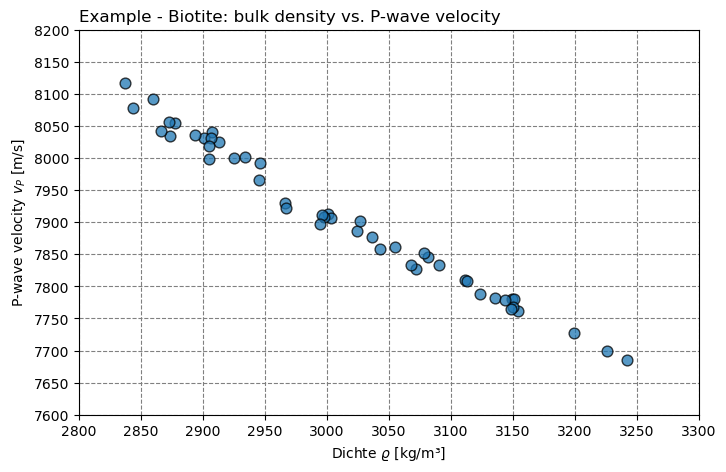

In [120]:
# Setup
xmin = 2800
xmax = 3300
xstep = 50
ymin = 7600
ymax = 8200
ystep = 50

# Diagram
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(data_biotite["rho"], data_biotite["vP"], s=60, alpha=0.75, edgecolor="black")

ax.set_title("Example - Biotite: bulk density vs. P-wave velocity", loc="left")
ax.set_xlabel("Dichte $\\varrho$ [kg/m³]")
ax.set_ylabel("P-wave velocity $v_P$ [m/s]")

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks(np.arange(xmin, xmax + xstep, xstep))
ax.set_yticks(np.arange(ymin, ymax + ystep, ystep))

ax.grid(visible=True, which="both", color="grey", linestyle="dashed")
ax.set_axisbelow(True)

plt.show()


In [122]:
output_path = "biotite_synthetic_data.csv"
data_biotite.to_csv(output_path, index=False)
print(f"Data successfully exported: {output_path}")

Data successfully exported: biotite_synthetic_data.csv
